In [2]:
import pandas as pd

data = pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


data = pd.read_csv('50_Startups.csv')
x = data.iloc[:,0].values
y = data.iloc[:,-1].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

x_test, x_train, y_test, y_train = train_test_split(x,y,test_size = 0.2, random_state = 3)

l_reg = LinearRegression().fit(x_train, y_train)

In [ ]:
from sklearn.metrics import r2_score
Er1 = r2_score(y_train,l_reg.predict(x_train))
Er2 = r2_score(y_test, l_reg.predict(x_test))

print("R2 score of linear regression (training): ", Er1)
print("R2 score of linear regression (test)", Er2)


R2 score of linear regression (training):  0.9569073774212309
R2 score of linear regression (test) 0.9418482637672432


Text(0.5, 1.0, 'R&D spend vs Profit')

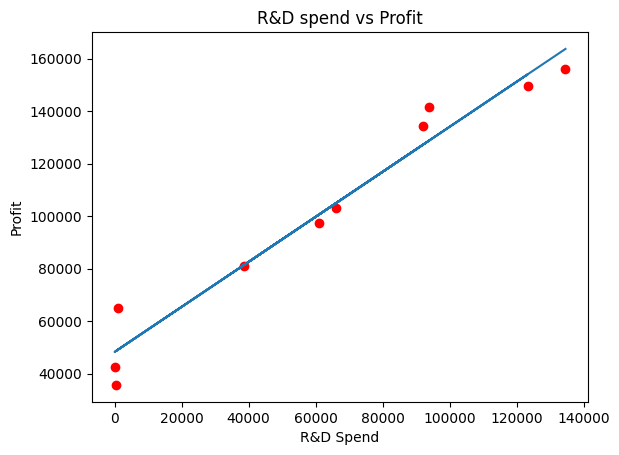

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train, color='red')
plt.plot(x_train, l_reg.predict(x_train))
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("R&D spend vs Profit")
plt.show()

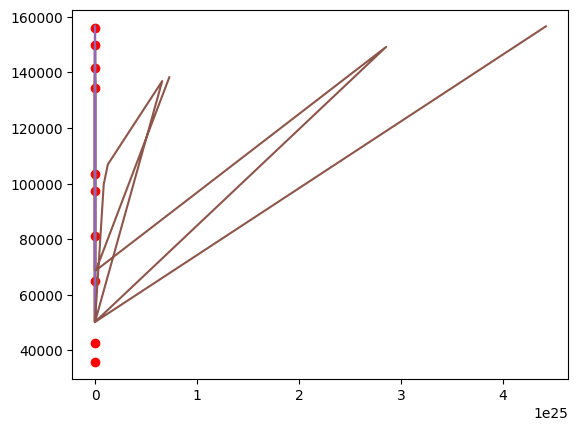

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
p_reg = PolynomialFeatures(degree=5)
x_poly = p_reg.fit_transform(x_train)

l_reg2 = LinearRegression().fit(x_poly, y_train)

plt.scatter(x_train,y_train, color='red')
plt.plot(x_poly, l_reg2.predict(x_poly))
plt.show()


In [ ]:
from sklearn.metrics import r2_score
Er3 = r2_score(y_train,l_reg2.predict(p_reg.fit_transform(x_train)))
print("R squared of Polynomial Regression: ", Er3)

R squared of Polynomial Regression:  0.9617291144094554
